In [1]:
import itertools

import ortools
import pandas as pd
from ALS.CP import solve_multiple_runways_cp, solve_single_runway_cp
from ALS.MIP import solve_multiple_runways_mip, solve_single_runway_mip
from ALS.performanceCP import performance_CP
from ALS.performanceMIP import performance_MIP
from ALS.utils import read_data
from ALS.visualization import visualize_solution
from ortools.sat.python import cp_model
from tqdm import tqdm

In [2]:
print(ortools.__version__)

9.11.4210


In [3]:
filename = "data/airland2.txt"

num_planes, planes_data, separation_times = read_data(filename)

num_runways = 2

	       Reading data from airland2.txt

-> Number of planes: 15 



In [4]:
decision_strategies_multiple = [
    {
        "variables": "position",
        "variable_strategy": cp_model.CHOOSE_FIRST,        
        "value_strategy": cp_model.SELECT_MIN_VALUE      
    },
    {
        "variables": "runway",
        "variable_strategy": cp_model.CHOOSE_FIRST,      
        "value_strategy": cp_model.SELECT_MAX_VALUE      
    }
]


solver, model = solve_multiple_runways_cp(num_planes, num_runways, planes_data, separation_times,
                            decision_strategies=decision_strategies_multiple, 
                            hint=True,  
                            search_strategy=cp_model.LP_SEARCH)
metrics_CP_multiple_runway = performance_CP(solver, model, planes_data)

		     Creating CP model

-> Number of decision variables created: 285
-> Number of constraints: 721

			Solving CP

-> Optimal Cost: 210.0

-> Planes that did not land on the target time:
  -> Plane 5: 118 | Target Time: 120 | Penalty: 60.0
  -> Plane 6: 126 | Target Time: 121 | Penalty: 150.0

		Performance Metrics for CP

-> Execution time (s): 0.12
-> Number of variables: 285
-> Number of constraints: 721
-> Solution Status: OPTIMAL
-> Number of Conflicts: 239
-> Number of Branches: 15584
-> Best objective bound: 210.0



		     Creating CP model

-> Number of decision variables created: 165
-> Number of constraints: 511

			Solving CP

-> Optimal Cost: 1480.0

-> Planes that did not land on the target time:
  -> Plane 0: 196 | Target Time: 155 | Penalty: 410.0
  -> Plane 2: 90 | Target Time: 93 | Penalty: 90.0
  -> Plane 4: 106 | Target Time: 111 | Penalty: 150.0
  -> Plane 5: 114 | Target Time: 120 | Penalty: 180.0
  -> Plane 6: 122 | Target Time: 121 | Penalty: 30.0
  -> Plane 7: 138 | Target Time: 120 | Penalty: 540.0
  -> Plane 8: 130 | Target Time: 128 | Penalty: 60.0
  -> Plane 10: 339 | Target Time: 341 | Penalty: 20.0

		Performance Metrics for CP

-> Execution time (s): 1.87
-> Number of variables: 165
-> Number of constraints: 511
-> Solution Status: OPTIMAL
-> Number of Conflicts: 1370
-> Number of Branches: 84083
-> Best objective bound: 1480.0



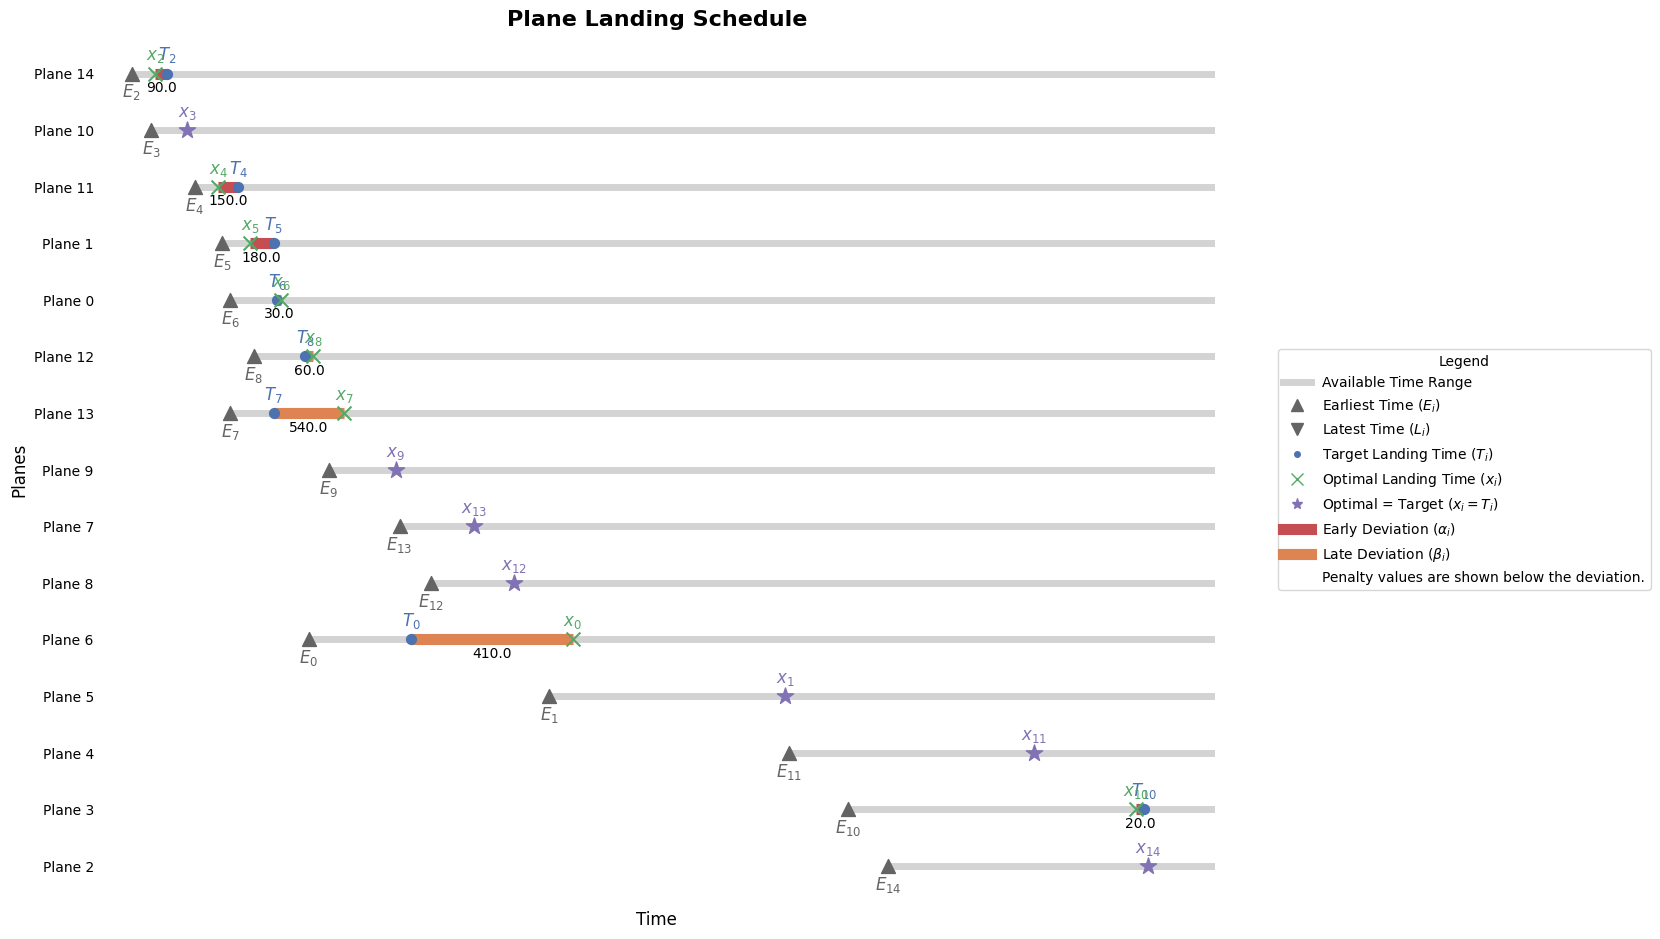

In [5]:
decision_strategies_single = [
    {
        "variables": "position",
        "variable_strategy": cp_model.CHOOSE_FIRST,        
        "value_strategy": cp_model.SELECT_MIN_VALUE      
    }
]

solver, model, variables = solve_single_runway_cp(num_planes, planes_data, separation_times, decision_strategies_single,
        hint=True, search_strategy=cp_model.FIXED_SEARCH)
metrics_CP_single_runway = performance_CP(solver, model, planes_data)

visualize_solution(solver, num_planes, planes_data, variables, approach="CP")

		     Creating CP model

-> Number of decision variables created: 165
-> Number of constraints: 511

			Solving CP

-> Optimal Cost: 1480.0

-> Planes that did not land on the target time:
  -> Plane 0: 196 | Target Time: 155 | Penalty: 410.0
  -> Plane 2: 90 | Target Time: 93 | Penalty: 90.0
  -> Plane 4: 106 | Target Time: 111 | Penalty: 150.0
  -> Plane 5: 114 | Target Time: 120 | Penalty: 180.0
  -> Plane 6: 130 | Target Time: 121 | Penalty: 270.0
  -> Plane 7: 122 | Target Time: 120 | Penalty: 60.0
  -> Plane 8: 138 | Target Time: 128 | Penalty: 300.0
  -> Plane 10: 339 | Target Time: 341 | Penalty: 20.0

		Performance Metrics for CP

-> Execution time (s): 1.49
-> Number of variables: 165
-> Number of constraints: 511
-> Solution Status: OPTIMAL
-> Number of Conflicts: 4732
-> Number of Branches: 19084
-> Best objective bound: 1480.0



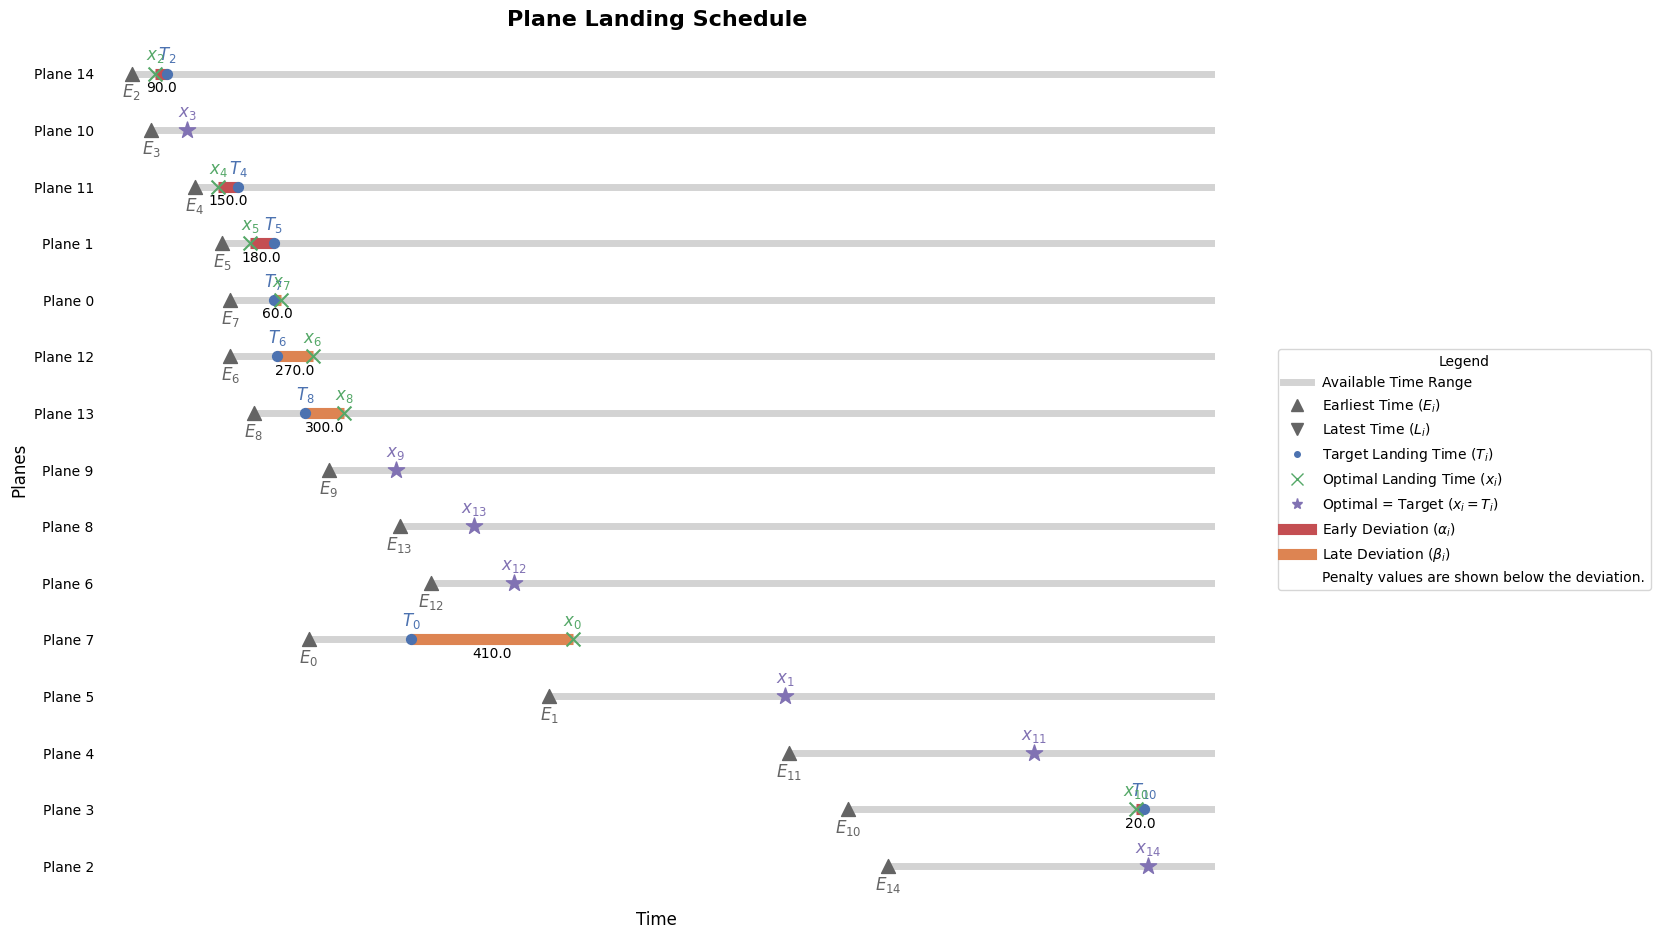

In [6]:
solver, model, variables = solve_single_runway_cp(
    num_planes, planes_data, separation_times, decision_strategies_single, hint=True
)
metrics_CP_single_runway = performance_CP(solver, model, planes_data)

visualize_solution(solver, num_planes, planes_data, variables, approach="CP")

		    Creating MIP Solver

-> Number of decision variables created: 255
-> Number of constraints: 420

			Solving MIP

-> Optimal Cost: 1480.0

-> Planes that did not land on the target time:
  -> Plane 0: 196.0 | Target Time: 155 | Penalty: 410.0
  -> Plane 2: 90.0 | Target Time: 93 | Penalty: 90.0
  -> Plane 4: 106.0 | Target Time: 111 | Penalty: 150.0
  -> Plane 5: 114.0 | Target Time: 120 | Penalty: 180.0
  -> Plane 6: 122.0 | Target Time: 121 | Penalty: 30.0
  -> Plane 7: 130.0 | Target Time: 120 | Penalty: 300.0
  -> Plane 8: 138.0 | Target Time: 128 | Penalty: 300.0
  -> Plane 10: 339.0 | Target Time: 341 | Penalty: 20.0

		Performance Metrics for MIP

-> Execution time: 0.51 seconds
-> Number of variables in the model: 255
-> Number of constraints in the model: 420
-> Total penalty: 1480.0



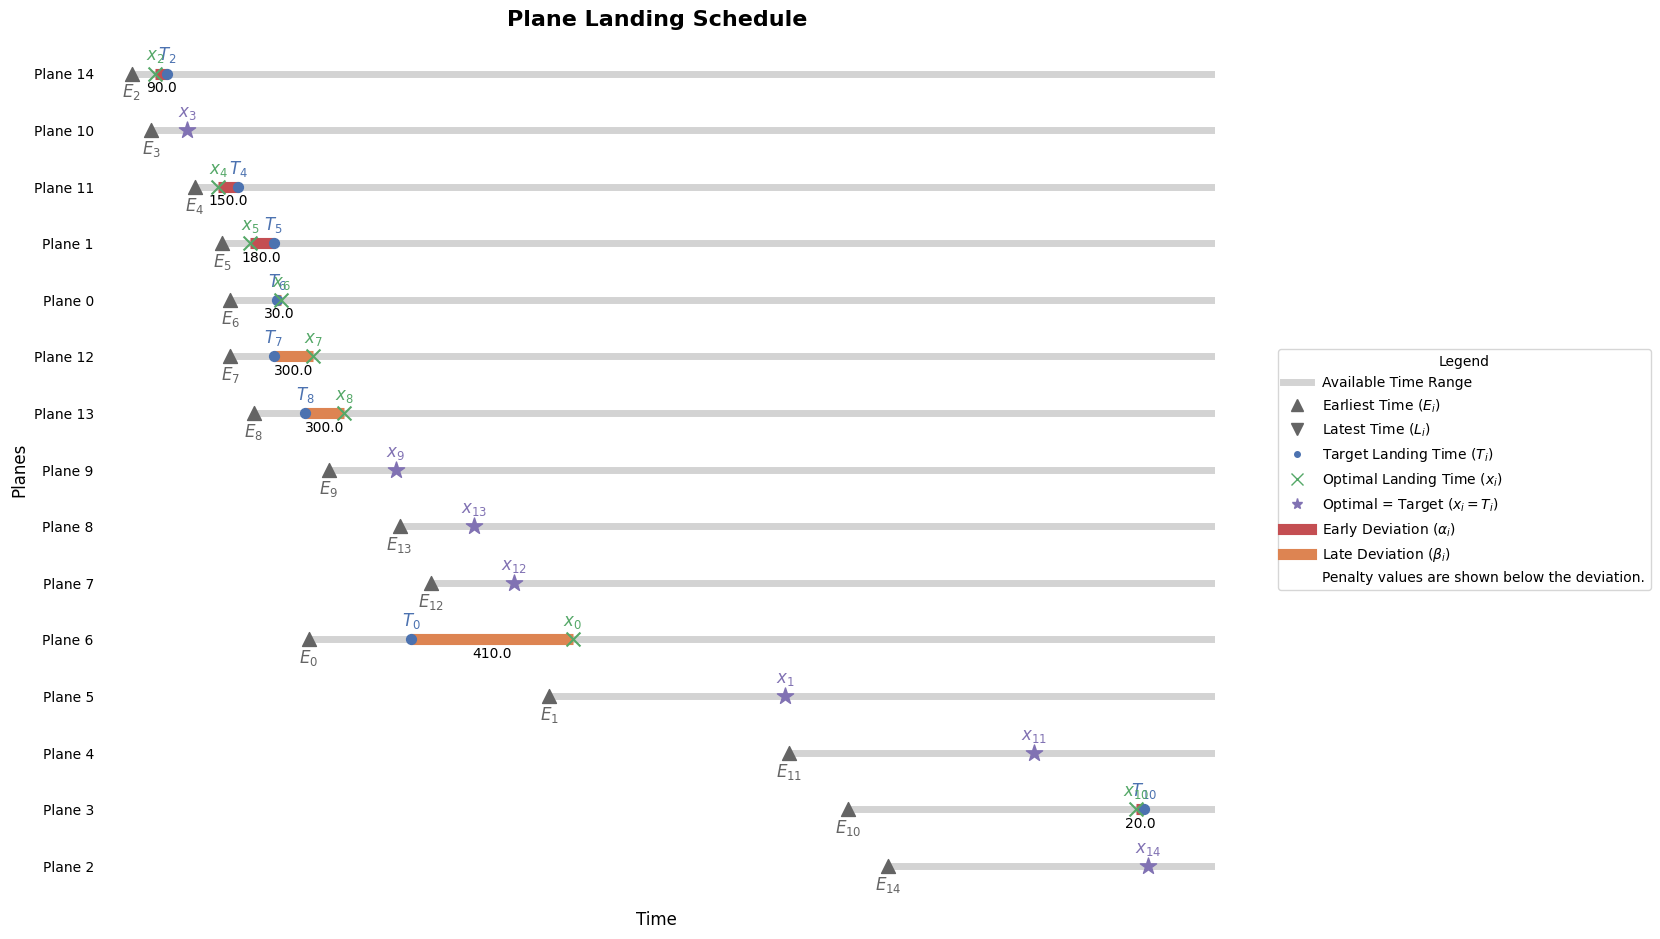

In [7]:
solver, variables = solve_single_runway_mip(num_planes, planes_data, separation_times)
metrics_MIP_single_runway = performance_MIP(solver)

visualize_solution(solver, num_planes, planes_data, variables, approach="MIP")

In [8]:
solver = solve_multiple_runways_mip(num_planes, num_runways, planes_data, separation_times)
metrics_MIP_multiple_runway = performance_MIP(solver)

		    Creating MIP Solver

-> Number of decision variables created: 495
-> Number of constraints: 750

			Solving MIP

-> Optimal Cost: 210.0

-> Planes that did not land on the target time:
  -> Plane 5: 113.0 | Target Time: 120 | Penalty: 210.0

		Performance Metrics for MIP

-> Execution time: 0.16 seconds
-> Number of variables in the model: 495
-> Number of constraints in the model: 750
-> Total penalty: 210.0



## **Hints**

In [9]:
file_numbers = range(1, 9)

DEFAULT_BRANCHING_STRATEGY = "DEFAULT"
DEFAULT_VARIABLE_STRATEGY = "DEFAULT"
DEFAULT_VALUE_STRATEGY = "DEFAULT"

# Initialize the results list
results = []

# Iterate through each file for both multiple and single runways
for file_num in tqdm(file_numbers, desc="Processing Files"):
    filename = f"data/airland{file_num}.txt"

    # Read the data from the file
    num_planes, planes_data, separation_times = read_data(filename)

    approaches = ["MIP", "CP"]
    runway_scenarios = ['multiple', 'single']
    hints = [True, False]

    for approach in approaches:
        for hint in hints:
            for runway_type in runway_scenarios:
                num_runs = 5

                # Initialize accumulators for metrics
                sum_metrics = {}
                count_success = 0
                # run_errors = []
                # non_numeric_metrics = set()

                for run in range(1, num_runs + 1):
                    print(f"  Run {run} of {num_runs}...")

                    metrics = {}

                    if approach == "MIP":
                        if runway_type == "multiple":
                            solver = solve_multiple_runways_mip(num_planes, num_runways, planes_data, separation_times, hint=hint)
                        else:
                            solver, variables = solve_single_runway_mip(num_planes, planes_data, separation_times, hint=hint)

                        metrics = performance_MIP(solver)

                    else:
                        if runway_type == "multiple":
                            solver, model = solve_multiple_runways_cp(
                                num_planes,
                                num_runways,
                                planes_data,
                                separation_times,
                                hint=hint,
                            )
                        else:
                            solver, model, variables = solve_single_runway_cp(
                                num_planes, planes_data, separation_times, hint=hint
                            )

                        metrics = performance_CP(solver, model, planes_data)

                    # Accumulate the metrics
                    for key, value in metrics.items():
                        if isinstance(value, (int, float)):
                            sum_metrics[key] = sum_metrics.get(key, 0) + value
                        # else:
                        #     # Log non-numeric metrics
                        #     non_numeric_metrics.add(key)

                    count_success += 1

                # Calculate the average of the metrics if at least one run was successful
                if count_success > 0:
                    average_metrics = {
                        key: value / count_success for key, value in sum_metrics.items()
                    }

                    if approach == "MIP":
                        average_metrics["conflicts"] = "NOT APPLICABLE"
                        average_metrics["branches"] = "NOT APPLICABLE"

                    # Store the results with the strategy details and average metrics
                    result = {
                        "file_name": filename,
                        "approach": approach,
                        "runway_type": runway_type,
                        "branching_strategy": DEFAULT_BRANCHING_STRATEGY,
                        "variable_strategy": DEFAULT_VARIABLE_STRATEGY,
                        "value_strategy": DEFAULT_VALUE_STRATEGY,
                        "hint": False,
                        "runs_successful": count_success,
                        "runs_failed": num_runs - count_success,
                    }

                    result.update(
                        average_metrics
                    )  # Add the averaged metrics to the result dictionary

                    # # Optionally, include details of any errors that occurred
                    # if run_errors:
                    #     result["errors"] = "; ".join(run_errors)

                    # # Optionally, include non-numeric metrics
                    # if non_numeric_metrics:
                    #     result["non_numeric_metrics"] = ", ".join(non_numeric_metrics)

                    results.append(result)
                else:
                    # All runs failed for this combination
                    error_result = {
                        "file_name": filename,
                        "runway_type": runway_type,
                        "branching_strategy": DEFAULT_BRANCHING_STRATEGY,
                        "variable_strategy": DEFAULT_VARIABLE_STRATEGY,
                        "value_strategy": DEFAULT_VALUE_STRATEGY,
                        "hint": False,
                        "runs_successful": 0,
                        "runs_failed": num_runs,
                        "errors": "All runs failed.",
                    }
                    results.append(error_result)

Processing Files:   0%|          | 0/8 [00:00<?, ?it/s]

	       Reading data from airland1.txt

-> Number of planes: 10 

  Run 1 of 5...
		    Creating MIP Solver

-> Number of decision variables created: 230
-> Number of constraints: 350

			Solving MIP

-> Optimal Cost: 90.0

-> Planes that did not land on the target time:
  -> Plane 5: 132.0 | Target Time: 135 | Penalty: 90.0

		Performance Metrics for MIP

-> Execution time: 0.05 seconds
-> Number of variables in the model: 230
-> Number of constraints in the model: 350
-> Total penalty: 90.0

  Run 2 of 5...
		    Creating MIP Solver

-> Number of decision variables created: 230
-> Number of constraints: 350

			Solving MIP

-> Optimal Cost: 90.0

-> Planes that did not land on the target time:
  -> Plane 5: 132.0 | Target Time: 135 | Penalty: 90.0

		Performance Metrics for MIP

-> Execution time: 0.03 seconds
-> Number of variables in the model: 230
-> Number of constraints in the model: 350
-> Total penalty: 90.0

  Run 3 of 5...
		    Creating MIP Solver

-> Number of decision var

Processing Files:  12%|█▎        | 1/8 [00:02<00:14,  2.07s/it]

-> Optimal Cost: 700.0

-> Planes that did not land on the target time:
  -> Plane 0: 165 | Target Time: 155 | Penalty: 100.0
  -> Plane 4: 118 | Target Time: 123 | Penalty: 150.0
  -> Plane 5: 126 | Target Time: 135 | Penalty: 270.0
  -> Plane 6: 134 | Target Time: 138 | Penalty: 120.0
  -> Plane 7: 142 | Target Time: 140 | Penalty: 60.0

		Performance Metrics for CP

-> Execution time (s): 0.06
-> Number of variables: 85
-> Number of constraints: 241
-> Solution Status: OPTIMAL
-> Number of Conflicts: 150
-> Number of Branches: 4008
-> Best objective bound: 700.0

	       Reading data from airland2.txt

-> Number of planes: 15 

  Run 1 of 5...
		    Creating MIP Solver

-> Number of decision variables created: 495
-> Number of constraints: 750

			Solving MIP

-> Optimal Cost: 210.0

-> Planes that did not land on the target time:
  -> Plane 6: 128.0 | Target Time: 121 | Penalty: 210.0

		Performance Metrics for MIP

-> Execution time: 0.05 seconds
-> Number of variables in the mode

Processing Files:  25%|██▌       | 2/8 [00:17<00:59,  9.86s/it]

-> Optimal Cost: 1480.0

-> Planes that did not land on the target time:
  -> Plane 0: 196 | Target Time: 155 | Penalty: 410.0
  -> Plane 2: 90 | Target Time: 93 | Penalty: 90.0
  -> Plane 4: 106 | Target Time: 111 | Penalty: 150.0
  -> Plane 5: 114 | Target Time: 120 | Penalty: 180.0
  -> Plane 6: 130 | Target Time: 121 | Penalty: 270.0
  -> Plane 7: 122 | Target Time: 120 | Penalty: 60.0
  -> Plane 8: 138 | Target Time: 128 | Penalty: 300.0
  -> Plane 10: 339 | Target Time: 341 | Penalty: 20.0

		Performance Metrics for CP

-> Execution time (s): 1.37
-> Number of variables: 165
-> Number of constraints: 511
-> Solution Status: OPTIMAL
-> Number of Conflicts: 2559
-> Number of Branches: 14029
-> Best objective bound: 1480.0

	       Reading data from airland3.txt

-> Number of planes: 20 

  Run 1 of 5...
		    Creating MIP Solver

-> Number of decision variables created: 860
-> Number of constraints: 1300

			Solving MIP

-> Optimal Cost: 60.0

-> Planes that did not land on the tar

Processing Files:  38%|███▊      | 3/8 [00:27<00:49,  9.89s/it]

-> Optimal Cost: 820.0

-> Planes that did not land on the target time:
  -> Plane 2: 184 | Target Time: 160 | Penalty: 240.0
  -> Plane 5: 101 | Target Time: 106 | Penalty: 150.0
  -> Plane 7: 109 | Target Time: 108 | Penalty: 30.0
  -> Plane 8: 141 | Target Time: 132 | Penalty: 270.0
  -> Plane 9: 133 | Target Time: 130 | Penalty: 90.0
  -> Plane 11: 125 | Target Time: 126 | Penalty: 30.0
  -> Plane 12: 335 | Target Time: 336 | Penalty: 10.0

		Performance Metrics for CP

-> Execution time (s): 0.25
-> Number of variables: 270
-> Number of constraints: 881
-> Solution Status: OPTIMAL
-> Number of Conflicts: 40
-> Number of Branches: 11590
-> Best objective bound: 820.0

	       Reading data from airland4.txt

-> Number of planes: 20 

  Run 1 of 5...
		    Creating MIP Solver

-> Number of decision variables created: 860
-> Number of constraints: 1300

			Solving MIP

-> Optimal Cost: 640.0

-> Planes that did not land on the target time:
  -> Plane 0: 90.0 | Target Time: 92 | Penalt

Processing Files:  50%|█████     | 4/8 [01:03<01:20, 20.23s/it]

-> Optimal Cost: 2520.0

-> Planes that did not land on the target time:
  -> Plane 0: 82 | Target Time: 92 | Penalty: 300.0
  -> Plane 1: 90 | Target Time: 93 | Penalty: 90.0
  -> Plane 2: 201 | Target Time: 183 | Penalty: 180.0
  -> Plane 5: 130 | Target Time: 117 | Penalty: 390.0
  -> Plane 6: 122 | Target Time: 118 | Penalty: 120.0
  -> Plane 7: 114 | Target Time: 116 | Penalty: 60.0
  -> Plane 8: 106 | Target Time: 112 | Penalty: 180.0
  -> Plane 11: 146 | Target Time: 156 | Penalty: 300.0
  -> Plane 12: 138 | Target Time: 137 | Penalty: 30.0
  -> Plane 14: 178 | Target Time: 174 | Penalty: 120.0
  -> Plane 15: 154 | Target Time: 156 | Penalty: 60.0
  -> Plane 17: 186 | Target Time: 169 | Penalty: 510.0
  -> Plane 18: 162 | Target Time: 168 | Penalty: 180.0

		Performance Metrics for CP

-> Execution time (s): 0.56
-> Number of variables: 270
-> Number of constraints: 881
-> Solution Status: OPTIMAL
-> Number of Conflicts: 1961
-> Number of Branches: 25731
-> Best objective bound:

Processing Files:  62%|██████▎   | 5/8 [02:30<02:12, 44.26s/it]

-> Optimal Cost: 3100.0

-> Planes that did not land on the target time:
  -> Plane 0: 201 | Target Time: 155 | Penalty: 460.0
  -> Plane 2: 82 | Target Time: 90 | Penalty: 240.0
  -> Plane 3: 90 | Target Time: 94 | Penalty: 120.0
  -> Plane 4: 98 | Target Time: 105 | Penalty: 210.0
  -> Plane 5: 114 | Target Time: 112 | Penalty: 60.0
  -> Plane 6: 130 | Target Time: 112 | Penalty: 540.0
  -> Plane 7: 106 | Target Time: 111 | Penalty: 150.0
  -> Plane 8: 122 | Target Time: 117 | Penalty: 150.0
  -> Plane 9: 138 | Target Time: 137 | Penalty: 30.0
  -> Plane 12: 162 | Target Time: 161 | Penalty: 30.0
  -> Plane 13: 146 | Target Time: 151 | Penalty: 150.0
  -> Plane 16: 170 | Target Time: 159 | Penalty: 330.0
  -> Plane 17: 178 | Target Time: 162 | Penalty: 480.0
  -> Plane 18: 154 | Target Time: 153 | Penalty: 30.0
  -> Plane 19: 186 | Target Time: 182 | Penalty: 120.0

		Performance Metrics for CP

-> Execution time (s): 3.28
-> Number of variables: 270
-> Number of constraints: 881
-> 

Processing Files:  75%|███████▌  | 6/8 [02:40<01:05, 32.61s/it]

-> Number of decision variables created: 555
-> Number of constraints: 1921

			Solving CP

-> Optimal Cost: 24442.0

-> Planes that did not land on the target time:
  -> Plane 1: 96 | Target Time: 79 | Penalty: 68.0
  -> Plane 2: 192 | Target Time: 144 | Penalty: 192.0
  -> Plane 3: 392 | Target Time: 204 | Penalty: 564.0
  -> Plane 4: 464 | Target Time: 264 | Penalty: 800.0
  -> Plane 5: 560 | Target Time: 320 | Penalty: 960.0
  -> Plane 6: 760 | Target Time: 528 | Penalty: 696.0
  -> Plane 7: 832 | Target Time: 635 | Penalty: 788.0
  -> Plane 8: 1032 | Target Time: 730 | Penalty: 906.0
  -> Plane 9: 1112 | Target Time: 766 | Penalty: 1038.0
  -> Plane 10: 1184 | Target Time: 790 | Penalty: 1576.0
  -> Plane 11: 1280 | Target Time: 920 | Penalty: 1440.0
  -> Plane 12: 1461 | Target Time: 1046 | Penalty: 830.0
  -> Plane 13: 1591 | Target Time: 1106 | Penalty: 485.0
  -> Plane 14: 1671 | Target Time: 1136 | Penalty: 1605.0
  -> Plane 15: 1751 | Target Time: 1166 | Penalty: 1755.0
  ->

Processing Files:  88%|████████▊ | 7/8 [03:03<00:29, 29.45s/it]

-> Optimal Cost: 1550.0

-> Planes that did not land on the target time:
  -> Plane 1: 96 | Target Time: 137 | Penalty: 82.0
  -> Plane 2: 296 | Target Time: 271 | Penalty: 25.0
  -> Plane 3: 376 | Target Time: 351 | Penalty: 25.0
  -> Plane 4: 456 | Target Time: 431 | Penalty: 25.0
  -> Plane 5: 528 | Target Time: 503 | Penalty: 50.0
  -> Plane 6: 624 | Target Time: 626 | Penalty: 4.0
  -> Plane 7: 720 | Target Time: 727 | Penalty: 14.0
  -> Plane 8: 920 | Target Time: 895 | Penalty: 25.0
  -> Plane 9: 992 | Target Time: 967 | Penalty: 50.0
  -> Plane 10: 1192 | Target Time: 1167 | Penalty: 25.0
  -> Plane 11: 1264 | Target Time: 1239 | Penalty: 50.0
  -> Plane 12: 1464 | Target Time: 1439 | Penalty: 25.0
  -> Plane 13: 1544 | Target Time: 1519 | Penalty: 25.0
  -> Plane 14: 1616 | Target Time: 1591 | Penalty: 50.0
  -> Plane 15: 1816 | Target Time: 1791 | Penalty: 25.0
  -> Plane 16: 1896 | Target Time: 1871 | Penalty: 25.0
  -> Plane 17: 1968 | Target Time: 1943 | Penalty: 50.0
  ->

Processing Files: 100%|██████████| 8/8 [05:26<00:00, 40.85s/it]

-> Optimal Cost: 1950.0

-> Planes that did not land on the target time:
  -> Plane 2: 152 | Target Time: 160 | Penalty: 80.0
  -> Plane 5: 100 | Target Time: 106 | Penalty: 180.0
  -> Plane 8: 133 | Target Time: 132 | Penalty: 30.0
  -> Plane 9: 136 | Target Time: 130 | Penalty: 180.0
  -> Plane 11: 125 | Target Time: 126 | Penalty: 30.0
  -> Plane 12: 325 | Target Time: 336 | Penalty: 110.0
  -> Plane 15: 422 | Target Time: 409 | Penalty: 130.0
  -> Plane 16: 341 | Target Time: 338 | Penalty: 30.0
  -> Plane 19: 175 | Target Time: 169 | Penalty: 180.0
  -> Plane 20: 619 | Target Time: 628 | Penalty: 135.0
  -> Plane 24: 392 | Target Time: 398 | Penalty: 90.0
  -> Plane 26: 428 | Target Time: 426 | Penalty: 40.0
  -> Plane 28: 516 | Target Time: 521 | Penalty: 75.0
  -> Plane 30: 688 | Target Time: 674 | Penalty: 210.0
  -> Plane 33: 556 | Target Time: 562 | Penalty: 60.0
  -> Plane 34: 407 | Target Time: 412 | Penalty: 75.0
  -> Plane 37: 569 | Target Time: 572 | Penalty: 60.0
  -> P

In [10]:
# Convert results to a DataFrame
df_results1 = pd.DataFrame(results)
df_results1.head(10)

,file_name,approach,runway_type,branching_strategy,variable_strategy,value_strategy,hint,runs_successful,runs_failed,exec_time,num_variables,num_constraints,best_objective,conflicts,branches
0,data/airland1.txt,MIP,multiple,DEFAULT,DEFAULT,DEFAULT,False,5,0,0.034800,230.0,350.0,90.0,NOT APPLICABLE,NOT APPLICABLE
1,data/airland1.txt,MIP,single,DEFAULT,DEFAULT,DEFAULT,False,5,0,0.038800,120.0,205.0,700.0,NOT APPLICABLE,NOT APPLICABLE
2,data/airland1.txt,MIP,multiple,DEFAULT,DEFAULT,DEFAULT,False,5,0,0.029200,230.0,350.0,90.0,NOT APPLICABLE,NOT APPLICABLE
3,data/airland1.txt,MIP,single,DEFAULT,DEFAULT,DEFAULT,False,5,0,0.055800,120.0,205.0,700.0,NOT APPLICABLE,NOT APPLICABLE
4,data/airland1.txt,CP,multiple,DEFAULT,DEFAULT,DEFAULT,False,5,0,0.038803,140.0,331.0,90.0,63.0,6050.0
5,data/airland1.txt,CP,single,DEFAULT,DEFAULT,DEFAULT,False,5,0,0.062078,85.0,241.0,700.0,144.8,2127.8
6,data/airland1.txt,CP,multiple,DEFAULT,DEFAULT,DEFAULT,False,5,0,0.038506,140.0,331.0,90.0,74.8,6126.6
7,data/airland1.txt,CP,single,DEFAULT,DEFAULT,DEFAULT,False,5,0,0.060200,85.0,241.0,700.0,143.2,3984.4
8,data/airland2.txt,MIP,multiple,DEFAULT,DEFAULT,DEFAULT,False,5,0,0.047600,495.0,750.0,210.0,NOT APPLICABLE,NOT APPLICABLE
9,data/airland2.txt,MIP,single,DEFAULT,DEFAULT,DEFAULT,False,5,0,0.344000,255.0,420.0,1480.0,NOT APPLICABLE,NOT APPLICABLE


## Single Runway

In [11]:
# Mapping strategies to their corresponding names
branching_strategies = [
    (cp_model.PORTFOLIO_SEARCH, "PORTFOLIO_SEARCH"),
    (cp_model.LP_SEARCH, "LP_SEARCH"),
    (cp_model.PSEUDO_COST_SEARCH, "PSEUDO_COST_SEARCH")
]

variables_strategies = [
    (cp_model.CHOOSE_MIN_DOMAIN_SIZE, "CHOOSE_MIN_DOMAIN_SIZE"),
    (cp_model.CHOOSE_MAX_DOMAIN_SIZE, "CHOOSE_MAX_DOMAIN_SIZE")
]

values_strategies = [
    (cp_model.SELECT_LOWER_HALF, "SELECT_LOWER_HALF"),
    (cp_model.SELECT_UPPER_HALF, "SELECT_UPPER_HALF")
]

# Number of runs per combination (similar to cross-validation)
num_runs = 5

# Prepare to store the results
results_cp_single = []

# Generate all possible combinations of strategies
all_combinations = list(itertools.product(branching_strategies, variables_strategies, values_strategies))

# Iterate over each combination of strategies
for (branching_strategy, branching_name), (var_strategy, var_name), (val_strategy, val_name) in all_combinations:
    print(f"Testing combination: Branching={branching_name}, Variable={var_name}, Value={val_name}")

    # Configure the decision strategies for a single runway
    decision_strategies_single = [
        {
            "variables": "position",  # Replace with your actual variable name
            "variable_strategy": var_strategy,
            "value_strategy": val_strategy
        },
        # Add more dictionaries if there are additional variables to configure
        # Example:
        # {
        #     "variables": "another_variable",
        #     "variable_strategy": cp_model.CHOOSE_FIRST,  # Another strategy
        #     "value_strategy": cp_model.SELECT_MIN_VALUE
        # }
    ]

    # Initialize accumulators for metrics
    sum_metrics = {}
    count_success = 0
    # run_errors = []
    # non_numeric_metrics = set()

    # Execute multiple runs for the same combination
    for run in range(1, num_runs + 1):
        print(f"  Run {run} of {num_runs}...")
        try:
            solver, model, variables = solve_single_runway_cp(
                num_planes,
                planes_data,
                separation_times,
                decision_strategies=decision_strategies_single,
                search_strategy=branching_strategy,
            )

            # Retrieve performance metrics
            metrics = performance_CP(solver, model, planes_data)

            # Accumulate the metrics
            for key, value in metrics.items():
                if isinstance(value, (int, float)):
                    if key in sum_metrics:
                        sum_metrics[key] += value
                    else:
                        sum_metrics[key] = value
                # else:
                #     # Log non-numeric metrics
                #     non_numeric_metrics.add(key)

            count_success += 1
        except Exception as e:
            error_message = f"Run {run} failed: {str(e)}"
            print(f"    Error: {error_message}")
            # run_errors.append(error_message)

    # Calculate the average of the metrics if at least one run was successful
    if count_success > 0:
        average_metrics = {key: value / count_success for key, value in sum_metrics.items()}

        # Store the results with the strategy details and average metrics
        result = {
            "approach": "CP",
            "branching_strategy": branching_name,
            "variable_strategy": var_name,
            "value_strategy": val_name,
            "hint": False,
            "runs_successful": count_success,
            "runs_failed": num_runs - count_success,
        }
        result.update(average_metrics)  # Add the averaged metrics to the result dictionary

        # # Optionally, include details of any errors that occurred
        # if run_errors:
        #     result["errors"] = "; ".join(run_errors)

        # # Optionally, include non-numeric metrics
        # if non_numeric_metrics:
        #     result["non_numeric_metrics"] = ", ".join(non_numeric_metrics)

        results_cp_single.append(result)
    else:
        # All runs failed for this combination
        error_result = {
            "approach": "CP",
            "branching_strategy": branching_name,
            "variable_strategy": var_name,
            "value_strategy": val_name,
            "hint": False,
            "runs_successful": 0,
            "runs_failed": num_runs,
            "error": "All runs failed.",
        }
        results_cp_single.append(error_result)

# Optional: Print the averaged results for verification
print("\nAveraged Results for All Combinations (Single Runway):")
for res in results_cp_single:
    print(res)

Testing combination: Branching=PORTFOLIO_SEARCH, Variable=CHOOSE_MIN_DOMAIN_SIZE, Value=SELECT_LOWER_HALF
  Run 1 of 5...
		     Creating CP model

-> Number of decision variables created: 1425
-> Number of constraints: 5201

			Solving CP

-> Optimal Cost: 1950.0

-> Planes that did not land on the target time:
  -> Plane 2: 152 | Target Time: 160 | Penalty: 80.0
  -> Plane 3: 116 | Target Time: 117 | Penalty: 30.0
  -> Plane 5: 100 | Target Time: 106 | Penalty: 180.0
  -> Plane 9: 135 | Target Time: 130 | Penalty: 150.0
  -> Plane 11: 124 | Target Time: 126 | Penalty: 60.0
  -> Plane 12: 325 | Target Time: 336 | Penalty: 110.0
  -> Plane 15: 422 | Target Time: 409 | Penalty: 130.0
  -> Plane 16: 341 | Target Time: 338 | Penalty: 30.0
  -> Plane 19: 175 | Target Time: 169 | Penalty: 180.0
  -> Plane 20: 619 | Target Time: 628 | Penalty: 135.0
  -> Plane 24: 392 | Target Time: 398 | Penalty: 90.0
  -> Plane 26: 428 | Target Time: 426 | Penalty: 40.0
  -> Plane 28: 516 | Target Time: 52

# Multiple Runway

In [12]:
# Mapping strategies to their corresponding names
branching_strategies = [
    (cp_model.PORTFOLIO_SEARCH, "PORTFOLIO_SEARCH"),
    (cp_model.LP_SEARCH, "LP_SEARCH"),
    (cp_model.PSEUDO_COST_SEARCH, "PSEUDO_COST_SEARCH")
]

variables_strategies = [
    (cp_model.CHOOSE_MIN_DOMAIN_SIZE, "CHOOSE_MIN_DOMAIN_SIZE"),
    (cp_model.CHOOSE_MAX_DOMAIN_SIZE, "CHOOSE_MAX_DOMAIN_SIZE")
]

values_strategies = [
    (cp_model.SELECT_LOWER_HALF, "SELECT_LOWER_HALF"),
    (cp_model.SELECT_UPPER_HALF, "SELECT_UPPER_HALF")
]

# Number of runs per combination (similar to cross-validation)
num_runs = 5

# Prepare to store the results
results_cp_multiple = []

# Generate all possible combinations of strategies
all_combinations = list(itertools.product(branching_strategies, variables_strategies, values_strategies))

# Iterate over each combination of strategies
for (branching_strategy, branching_name), (var_strategy, var_name), (val_strategy, val_name) in all_combinations:
    print(f"Testing combination: Branching={branching_name}, Variable={var_name}, Value={val_name}")

    # Configure the decision strategies for multiple runways
    # Adjust the "variables" field based on your actual decision variables
    decision_strategies_multiple = [
        {
            "variables": "position",  # Replace with your actual variable name
            "variable_strategy": var_strategy,
            "value_strategy": val_strategy
        },
        # Add more dictionaries if there are additional variables to configure
        # Example:
        # {
        #     "variables": "another_variable",
        #     "variable_strategy": cp_model.CHOOSE_FIRST,  # Another strategy
        #     "value_strategy": cp_model.SELECT_MIN_VALUE
        # }
    ]

    # Initialize accumulators for metrics
    sum_metrics = {}
    count_success = 0
    # run_errors = []
    # non_numeric_metrics = set()

    # Execute multiple runs for the same combination
    for run in range(1, num_runs + 1):
        print(f"  Run {run} of {num_runs}...")
        try:
            solver, model = solve_multiple_runways_cp(
                num_planes,
                num_runways,
                planes_data,
                separation_times,
                decision_strategies=decision_strategies_multiple,
                search_strategy=branching_strategy,
            )

            # Retrieve performance metrics
            metrics = performance_CP(solver, model, planes_data)

            # Accumulate the metrics
            for key, value in metrics.items():
                if isinstance(value, (int, float)):
                    if key in sum_metrics:
                        sum_metrics[key] += value
                    else:
                        sum_metrics[key] = value
                # else:
                #     # Log non-numeric metrics
                #     non_numeric_metrics.add(key)

            count_success += 1
        except Exception as e:
            error_message = f"Run {run} failed: {str(e)}"
            print(f"    Error: {error_message}")
            # run_errors.append(error_message)

    # Calculate the average of the metrics if at least one run was successful
    if count_success > 0:
        average_metrics = {key: value / count_success for key, value in sum_metrics.items()}

        # Store the results with the strategy details and average metrics
        result = {
            "approach": "CP",
            "branching_strategy": branching_name,
            "variable_strategy": var_name,
            "value_strategy": val_name,
            "hint": False,
            "runs_successful": count_success,
            "runs_failed": num_runs - count_success,
        }
        result.update(average_metrics)  # Add the averaged metrics to the result dictionary

        # # Optionally, include details of any errors that occurred
        # if run_errors:
        #     result["errors"] = "; ".join(run_errors)

        # # Optionally, include non-numeric metrics
        # if non_numeric_metrics:
        #     result["non_numeric_metrics"] = ", ".join(non_numeric_metrics)

        results_cp_multiple.append(result)
    else:
        # All runs failed for this combination
        error_result = {
            "approach": "CP",
            "branching_strategy": branching_name,
            "variable_strategy": var_name,
            "value_strategy": val_name,
            "hint": False,
            "runs_successful": 0,
            "runs_failed": num_runs,
            "error": "All runs failed.",
        }
        results_cp_multiple.append(error_result)

# Optional: Print the averaged results for verification
print("\nAveraged Results for All Combinations (Multiple Runways):")
for res in results_cp_multiple:
    print(res)

Testing combination: Branching=PORTFOLIO_SEARCH, Variable=CHOOSE_MIN_DOMAIN_SIZE, Value=SELECT_LOWER_HALF
  Run 1 of 5...
		     Creating CP model

-> Number of decision variables created: 2700
-> Number of constraints: 7651

			Solving CP

-> Optimal Cost: 135.0

-> Planes that did not land on the target time:
  -> Plane 2: 154 | Target Time: 160 | Penalty: 60.0
  -> Plane 8: 133 | Target Time: 132 | Penalty: 30.0
  -> Plane 16: 341 | Target Time: 338 | Penalty: 30.0
  -> Plane 34: 411 | Target Time: 412 | Penalty: 15.0

		Performance Metrics for CP

-> Execution time (s): 4.50
-> Number of variables: 2700
-> Number of constraints: 7651
-> Solution Status: OPTIMAL
-> Number of Conflicts: 7248
-> Number of Branches: 226028
-> Best objective bound: 135.0

  Run 2 of 5...
		     Creating CP model

-> Number of decision variables created: 2700
-> Number of constraints: 7651

			Solving CP

-> Optimal Cost: 135.0

-> Planes that did not land on the target time:
  -> Plane 2: 154 | Target T

# Dataframe

In [13]:
# -------------------------------
# Step 1: Convert Lists to DataFrames
# -------------------------------

# Convert results_cp_multiple to a DataFrame
df_cp_multiple = pd.DataFrame(results_cp_multiple)

# Convert results_cp_single to a DataFrame
df_cp_single = pd.DataFrame(results_cp_single)

# -------------------------------
# Step 2: Add 'runway_type' Column
# -------------------------------

# Add a new column 'runway_type' to indicate the scenario
df_cp_multiple['runway_type'] = 'multiple'
df_cp_single['runway_type'] = 'single'

# -------------------------------
# Step 3: Combine Both DataFrames
# -------------------------------

# Combine the two DataFrames into one
combined_df = pd.concat([df_cp_multiple, df_cp_single], ignore_index=True)

# Optional: Reorder columns to place 'runway_type' first for clarity
cols = ['approach', 'runway_type'] + [col for col in combined_df.columns if col != 'runway_type' and col != 'approach']
combined_df = combined_df[cols]

# -------------------------------
# Step 4: Inspect the DataFrames
# -------------------------------

# Print the first few rows of the multiple runways DataFrame
print("Sample of Multiple Runways Results:")
print(df_cp_multiple.head())

# Print the first few rows of the single runway DataFrame
print("\nSample of Single Runway Results:")
print(df_cp_single.head())

# Print the first few rows of the combined DataFrame
print("\nSample of Combined Runway Results:")
print(combined_df.head())


Sample of Multiple Runways Results:
  approach branching_strategy       variable_strategy     value_strategy  \
0       CP   PORTFOLIO_SEARCH  CHOOSE_MIN_DOMAIN_SIZE  SELECT_LOWER_HALF   
1       CP   PORTFOLIO_SEARCH  CHOOSE_MIN_DOMAIN_SIZE  SELECT_UPPER_HALF   
2       CP   PORTFOLIO_SEARCH  CHOOSE_MAX_DOMAIN_SIZE  SELECT_LOWER_HALF   
3       CP   PORTFOLIO_SEARCH  CHOOSE_MAX_DOMAIN_SIZE  SELECT_UPPER_HALF   
4       CP          LP_SEARCH  CHOOSE_MIN_DOMAIN_SIZE  SELECT_LOWER_HALF   

    hint  runs_successful  runs_failed  exec_time  num_variables  \
0  False                5            0   4.741905         2700.0   
1  False                5            0   5.066460         2700.0   
2  False                5            0   4.201791         2700.0   
3  False                5            0   4.215721         2700.0   
4  False                5            0   4.109865         2700.0   

   num_constraints  conflicts  branches  best_objective runway_type  
0           7651.0     7248.

In [14]:
df_cp_multiple.head()

,approach,branching_strategy,variable_strategy,value_strategy,hint,runs_successful,runs_failed,exec_time,num_variables,num_constraints,conflicts,branches,best_objective,runway_type
0,CP,PORTFOLIO_SEARCH,CHOOSE_MIN_DOMAIN_SIZE,SELECT_LOWER_HALF,False,5,0,4.741905,2700.0,7651.0,7248.0,226028.0,135.0,multiple
1,CP,PORTFOLIO_SEARCH,CHOOSE_MIN_DOMAIN_SIZE,SELECT_UPPER_HALF,False,5,0,5.066460,2700.0,7651.0,7248.0,226028.0,135.0,multiple
2,CP,PORTFOLIO_SEARCH,CHOOSE_MAX_DOMAIN_SIZE,SELECT_LOWER_HALF,False,5,0,4.201791,2700.0,7651.0,6411.4,209775.4,135.0,multiple
3,CP,PORTFOLIO_SEARCH,CHOOSE_MAX_DOMAIN_SIZE,SELECT_UPPER_HALF,False,5,0,4.215721,2700.0,7651.0,7248.0,226028.0,135.0,multiple
4,CP,LP_SEARCH,CHOOSE_MIN_DOMAIN_SIZE,SELECT_LOWER_HALF,False,5,0,4.109865,2700.0,7651.0,7248.0,226028.0,135.0,multiple


In [15]:
df_cp_single.head()

,approach,branching_strategy,variable_strategy,value_strategy,hint,runs_successful,runs_failed,exec_time,num_variables,num_constraints,conflicts,branches,best_objective,runway_type
0,CP,PORTFOLIO_SEARCH,CHOOSE_MIN_DOMAIN_SIZE,SELECT_LOWER_HALF,False,5,0,14.050423,1425.0,5201.0,16016.2,278886.4,1950.0,single
1,CP,PORTFOLIO_SEARCH,CHOOSE_MIN_DOMAIN_SIZE,SELECT_UPPER_HALF,False,5,0,25.113875,1425.0,5201.0,34315.0,351733.4,1950.0,single
2,CP,PORTFOLIO_SEARCH,CHOOSE_MAX_DOMAIN_SIZE,SELECT_LOWER_HALF,False,5,0,9.592660,1425.0,5201.0,10051.0,206106.0,1950.0,single
3,CP,PORTFOLIO_SEARCH,CHOOSE_MAX_DOMAIN_SIZE,SELECT_UPPER_HALF,False,5,0,10.918209,1425.0,5201.0,10051.0,206106.0,1950.0,single
4,CP,LP_SEARCH,CHOOSE_MIN_DOMAIN_SIZE,SELECT_LOWER_HALF,False,5,0,8.496899,1425.0,5201.0,10757.4,175953.0,1950.0,single


In [16]:
combined_df.head()

,approach,runway_type,branching_strategy,variable_strategy,value_strategy,hint,runs_successful,runs_failed,exec_time,num_variables,num_constraints,conflicts,branches,best_objective
0,CP,multiple,PORTFOLIO_SEARCH,CHOOSE_MIN_DOMAIN_SIZE,SELECT_LOWER_HALF,False,5,0,4.741905,2700.0,7651.0,7248.0,226028.0,135.0
1,CP,multiple,PORTFOLIO_SEARCH,CHOOSE_MIN_DOMAIN_SIZE,SELECT_UPPER_HALF,False,5,0,5.066460,2700.0,7651.0,7248.0,226028.0,135.0
2,CP,multiple,PORTFOLIO_SEARCH,CHOOSE_MAX_DOMAIN_SIZE,SELECT_LOWER_HALF,False,5,0,4.201791,2700.0,7651.0,6411.4,209775.4,135.0
3,CP,multiple,PORTFOLIO_SEARCH,CHOOSE_MAX_DOMAIN_SIZE,SELECT_UPPER_HALF,False,5,0,4.215721,2700.0,7651.0,7248.0,226028.0,135.0
4,CP,multiple,LP_SEARCH,CHOOSE_MIN_DOMAIN_SIZE,SELECT_LOWER_HALF,False,5,0,4.109865,2700.0,7651.0,7248.0,226028.0,135.0


# Multiple files 

## TESTES PODEM ESTAR MAL

In [ ]:
file_numbers = range(1, 9) 

branching_strategies = [
    (cp_model.PORTFOLIO_SEARCH, "PORTFOLIO_SEARCH"),
    (cp_model.LP_SEARCH, "LP_SEARCH"),
    (cp_model.PSEUDO_COST_SEARCH, "PSEUDO_COST_SEARCH")
]

variables_strategies = [
    (cp_model.CHOOSE_MIN_DOMAIN_SIZE, "CHOOSE_MIN_DOMAIN_SIZE"),
    (cp_model.CHOOSE_MAX_DOMAIN_SIZE, "CHOOSE_MAX_DOMAIN_SIZE")
]

values_strategies = [
    (cp_model.SELECT_LOWER_HALF, "SELECT_LOWER_HALF"),
    (cp_model.SELECT_UPPER_HALF, "SELECT_UPPER_HALF")
]

# Initialize the results list
results = []


# Iterate through each file for both multiple and single runways
for file_num in tqdm(file_numbers, desc="Processing Files"):
    filename = f"data/airland{file_num}.txt"

    # Read the data from the file
    num_planes, planes_data, separation_times = read_data(filename)

    # Define runway scenarios: multiple and single
    runway_scenarios = ['multiple', 'single']

    for runway_type in runway_scenarios:
        # Select appropriate solver function based on runway_type
        if runway_type == 'multiple':
            solve_cp = solve_multiple_runways_cp
            num_runways = 2  # Example value; adjust as needed
        else:
            solve_cp = solve_single_runway_cp
            num_runways = 1  # Single runway

        # Iterate through all strategy combinations
        for (branching_strategy, branching_name), (var_strategy, var_name), (val_strategy, val_name) in itertools.product(
            branching_strategies, variables_strategies, values_strategies
        ):
            # Print current combination and file being processed
            print(f"\nTesting combination ({runway_type.capitalize()} Runways): Branching={branching_name}, Variable={var_name}, Value={val_name} on {filename}")

            # Configure the decision strategies based on runway type
            decision_strategies = [
                {
                    "variables": "position",  # Replace with your actual variable name
                    "variable_strategy": var_strategy,
                    "value_strategy": val_strategy
                },
                # Add more dictionaries if there are additional variables to configure
            ]

            # Initialize accumulators for metrics
            sum_metrics = {}
            count_success = 0
            # run_errors = []
            # non_numeric_metrics = set()

            # Execute multiple runs for the same combination
            for run in range(1, num_runs + 1):
                print(f"  Run {run} of {num_runs}...")
                try:
                    # Call your solver function
                    if runway_type == 'multiple':
                        solver, model = solve_cp(
                            num_planes,
                            num_runways,
                            planes_data,
                            separation_times,
                            decision_strategies=decision_strategies,
                            search_strategy=branching_strategy,
                        )
                    else:
                        solver, model, variables = solve_cp(
                            num_planes,
                            planes_data=planes_data,
                            separation_times=separation_times,
                            decision_strategies=decision_strategies,
                            search_strategy=branching_strategy,
                        )

                    # Retrieve performance metrics
                    metrics = performance_CP(solver, model, planes_data)

                    # Accumulate the metrics
                    for key, value in metrics.items():
                        if isinstance(value, (int, float)):
                            sum_metrics[key] = sum_metrics.get(key, 0) + value
                        # else:
                        #     # Log non-numeric metrics
                        #     non_numeric_metrics.add(key)

                    count_success += 1
                except Exception as e:
                    error_message = f"Run {run} failed: {str(e)}"
                    print(f"    Error: {error_message}")
                    # run_errors.append(error_message)

            # Calculate the average of the metrics if at least one run was successful
            if count_success > 0:
                average_metrics = {key: value / count_success for key, value in sum_metrics.items()}

                # Store the results with the strategy details and average metrics
                result = {
                    "file_name": filename,
                    "approach": "CP",
                    "runway_type": runway_type,
                    "branching_strategy": branching_name,
                    "variable_strategy": var_name,
                    "value_strategy": val_name,
                    "hint": False,
                    "runs_successful": count_success,
                    "runs_failed": num_runs - count_success,
                }
                result.update(average_metrics)  # Add the averaged metrics to the result dictionary

                # # Optionally, include details of any errors that occurred
                # if run_errors:
                #     result["errors"] = "; ".join(run_errors)

                # # Optionally, include non-numeric metrics
                # if non_numeric_metrics:
                #     result["non_numeric_metrics"] = ", ".join(non_numeric_metrics)

                results.append(result)
            else:
                # All runs failed for this combination
                error_result = {
                    "file_name": filename,
                    "approach": "CP",
                    "runway_type": runway_type,
                    "branching_strategy": branching_name,
                    "variable_strategy": var_name,
                    "value_strategy": val_name,
                    "hint": False,
                    "runs_successful": 0,
                    "runs_failed": num_runs,
                    "errors": "All runs failed.",
                }
                results.append(error_result)

Processing Files:   0%|          | 0/8 [00:00<?, ?it/s]

	       Reading data from airland1.txt

-> Number of planes: 10 


Testing combination (Multiple Runways): Branching=PORTFOLIO_SEARCH, Variable=CHOOSE_MIN_DOMAIN_SIZE, Value=SELECT_LOWER_HALF on data/airland1.txt
  Run 1 of 5...
		     Creating CP model

-> Number of decision variables created: 140
-> Number of constraints: 331

			Solving CP

-> Optimal Cost: 90.0

-> Planes that did not land on the target time:
  -> Plane 5: 134 | Target Time: 135 | Penalty: 30.0
  -> Plane 7: 142 | Target Time: 140 | Penalty: 60.0

		Performance Metrics for CP

-> Execution time (s): 0.13
-> Number of variables: 140
-> Number of constraints: 331
-> Solution Status: OPTIMAL
-> Number of Conflicts: 505
-> Number of Branches: 6013
-> Best objective bound: 90.0

  Run 2 of 5...
		     Creating CP model

-> Number of decision variables created: 140
-> Number of constraints: 331

			Solving CP

-> Optimal Cost: 90.0

-> Planes that did not land on the target time:
  -> Plane 5: 132 | Target Time: 135 | Pe

Processing Files:  12%|█▎        | 1/8 [00:10<01:12, 10.42s/it]

-> Optimal Cost: 700.0

-> Planes that did not land on the target time:
  -> Plane 0: 165 | Target Time: 155 | Penalty: 100.0
  -> Plane 4: 118 | Target Time: 123 | Penalty: 150.0
  -> Plane 5: 126 | Target Time: 135 | Penalty: 270.0
  -> Plane 6: 134 | Target Time: 138 | Penalty: 120.0
  -> Plane 7: 142 | Target Time: 140 | Penalty: 60.0

		Performance Metrics for CP

-> Execution time (s): 0.07
-> Number of variables: 85
-> Number of constraints: 241
-> Solution Status: OPTIMAL
-> Number of Conflicts: 208
-> Number of Branches: 4001
-> Best objective bound: 700.0

  Run 5 of 5...
		     Creating CP model

-> Number of decision variables created: 85
-> Number of constraints: 241

			Solving CP

-> Optimal Cost: 700.0

-> Planes that did not land on the target time:
  -> Plane 0: 165 | Target Time: 155 | Penalty: 100.0
  -> Plane 4: 118 | Target Time: 123 | Penalty: 150.0
  -> Plane 5: 126 | Target Time: 135 | Penalty: 270.0
  -> Plane 6: 134 | Target Time: 138 | Penalty: 120.0
  -> Pl

Processing Files:  25%|██▌       | 2/8 [02:52<09:56, 99.39s/it]

-> Optimal Cost: 1480.0

-> Planes that did not land on the target time:
  -> Plane 0: 196 | Target Time: 155 | Penalty: 410.0
  -> Plane 2: 90 | Target Time: 93 | Penalty: 90.0
  -> Plane 4: 106 | Target Time: 111 | Penalty: 150.0
  -> Plane 5: 122 | Target Time: 120 | Penalty: 60.0
  -> Plane 6: 138 | Target Time: 121 | Penalty: 510.0
  -> Plane 7: 114 | Target Time: 120 | Penalty: 180.0
  -> Plane 8: 130 | Target Time: 128 | Penalty: 60.0
  -> Plane 10: 339 | Target Time: 341 | Penalty: 20.0

		Performance Metrics for CP

-> Execution time (s): 2.62
-> Number of variables: 165
-> Number of constraints: 511
-> Solution Status: OPTIMAL
-> Number of Conflicts: 1487
-> Number of Branches: 82921
-> Best objective bound: 1480.0

	       Reading data from airland3.txt

-> Number of planes: 20 


Testing combination (Multiple Runways): Branching=PORTFOLIO_SEARCH, Variable=CHOOSE_MIN_DOMAIN_SIZE, Value=SELECT_LOWER_HALF on data/airland3.txt
  Run 1 of 5...
		     Creating CP model

-> Number

Processing Files:  38%|███▊      | 3/8 [03:50<06:42, 80.54s/it]

-> Optimal Cost: 820.0

-> Planes that did not land on the target time:
  -> Plane 2: 184 | Target Time: 160 | Penalty: 240.0
  -> Plane 3: 116 | Target Time: 117 | Penalty: 30.0
  -> Plane 5: 100 | Target Time: 106 | Penalty: 180.0
  -> Plane 9: 140 | Target Time: 130 | Penalty: 300.0
  -> Plane 11: 124 | Target Time: 126 | Penalty: 60.0
  -> Plane 12: 335 | Target Time: 336 | Penalty: 10.0

		Performance Metrics for CP

-> Execution time (s): 0.44
-> Number of variables: 270
-> Number of constraints: 881
-> Solution Status: OPTIMAL
-> Number of Conflicts: 338
-> Number of Branches: 17214
-> Best objective bound: 820.0

	       Reading data from airland4.txt

-> Number of planes: 20 


Testing combination (Multiple Runways): Branching=PORTFOLIO_SEARCH, Variable=CHOOSE_MIN_DOMAIN_SIZE, Value=SELECT_LOWER_HALF on data/airland4.txt
  Run 1 of 5...
		     Creating CP model

-> Number of decision variables created: 480
-> Number of constraints: 1261

			Solving CP

-> Optimal Cost: 640.0



In [ ]:
# merge the results
df_results2 = pd.DataFrame(results)
merged_results = pd.concat([df_results1, df_results2], ignore_index=True)

merged_results.head(10)

In [ ]:
merged_results.shape